<a href="https://colab.research.google.com/github/leman-cap13/kaggle_datasets_/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

fashion_mnist=tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist
X_train,y_train=X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid=X_train_full[-5000:],y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

 1 piksel 0 ile 255 arasi

In [ ]:
X_train,X_valid,X_test=X_train/255.,X_valid/255.,X_test/255.

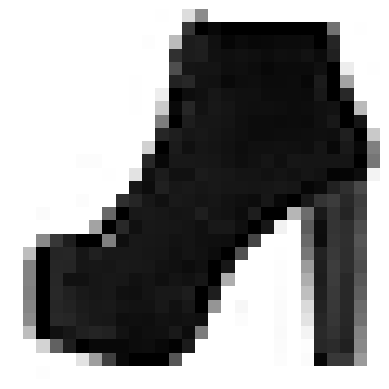

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[44],cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names=['t-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

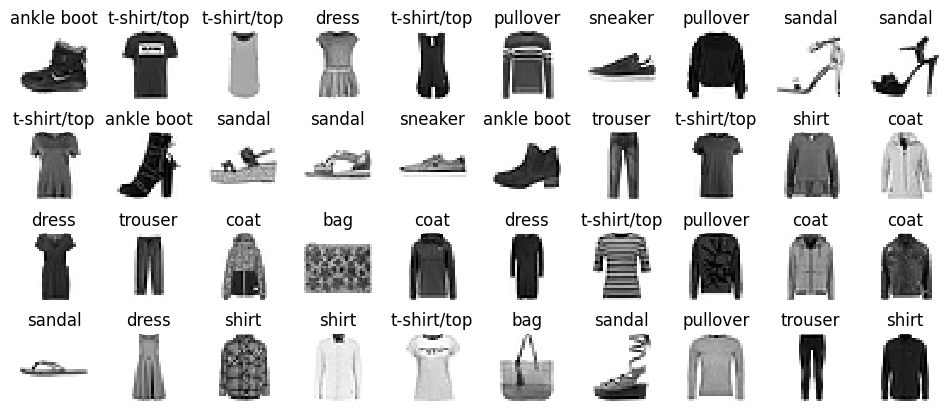

In [ ]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2,n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row+col
    plt.subplot(n_rows,n_cols,index+1)
    plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])

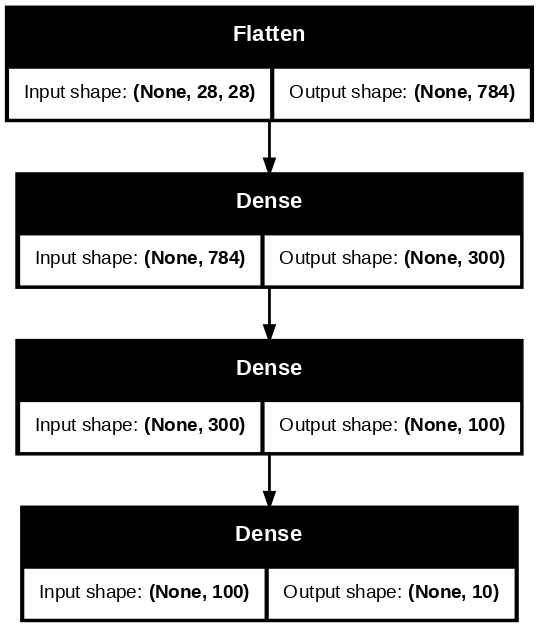

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=100)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1=model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights,biases=hidden1.get_weights()
weights

array([[ 0.0338384 , -0.07103785, -0.03942328, ..., -0.04691196,
        -0.0049895 , -0.06117486],
       [ 0.04095393, -0.07118507, -0.00472379, ..., -0.06281925,
        -0.00889802, -0.02880624],
       [-0.0338923 ,  0.01635863, -0.04476015, ..., -0.05091865,
         0.06856434,  0.052112  ],
       ...,
       [-0.0229354 , -0.04467107, -0.03009183, ..., -0.06520316,
        -0.02843511,  0.04528756],
       [ 0.0113835 , -0.05685312,  0.04699706, ...,  0.04170964,
        -0.04967137,  0.03380853],
       [-0.06436902,  0.00405367,  0.05713074, ...,  0.02187633,
         0.01333147, -0.05374637]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#Compiling the model

In [ ]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

'sparse_categorical_crossentropy'
 categorical_crossentropy

In [ ]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
tf.keras.utils.to_categorical([0,5,1,0],num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import numpy as np
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
    axis=1

)

array([0, 5, 1, 0])

# Training and Evaluating model

In [ ]:
history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.9755 - sparse_categorical_accuracy: 0.6906 - val_loss: 0.5050 - val_sparse_categorical_accuracy: 0.8292
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5028 - sparse_categorical_accuracy: 0.8278 - val_loss: 0.4567 - val_sparse_categorical_accuracy: 0.8398
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4492 - sparse_categorical_accuracy: 0.8450 - val_loss: 0.4332 - val_sparse_categorical_accuracy: 0.8466
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4189 - sparse_categorical_accuracy: 0.8543 - val_loss: 0.4188 - val_sparse_categorical_accuracy: 0.8506
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.3970 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.4069 - val_sparse_categorical_accuracy: 0.8544
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3799 - sparse_categorical_accuracy: 0.8672 - val_loss: 0.3971 - val_sparse_categorical_accuracy

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history

{'loss': [0.702838659286499,
  0.4828301966190338,
  0.43772727251052856,
  0.4104155898094177,
  0.39022696018218994,
  0.37418562173843384,
  0.36077141761779785,
  0.34899839758872986,
  0.3386801779270172,
  0.32916656136512756,
  0.3205893039703369,
  0.3128720819950104,
  0.30554187297821045,
  0.298725962638855,
  0.29235509037971497,
  0.2862316370010376,
  0.28043854236602783,
  0.2749606668949127,
  0.26963573694229126,
  0.2645713686943054,
  0.259697824716568,
  0.25496968626976013,
  0.25043389201164246,
  0.2460087239742279,
  0.24160011112689972,
  0.23738549649715424,
  0.23336543142795563,
  0.22921228408813477,
  0.22535105049610138,
  0.22141939401626587],
 'sparse_categorical_accuracy': [0.767127275466919,
  0.8328545689582825,
  0.8478181958198547,
  0.8568545579910278,
  0.8630545735359192,
  0.868436336517334,
  0.8722909092903137,
  0.8755090832710266,
  0.8790000081062317,
  0.8820000290870667,
  0.885345458984375,
  0.8876909017562866,
  0.890181839466095,
  0

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

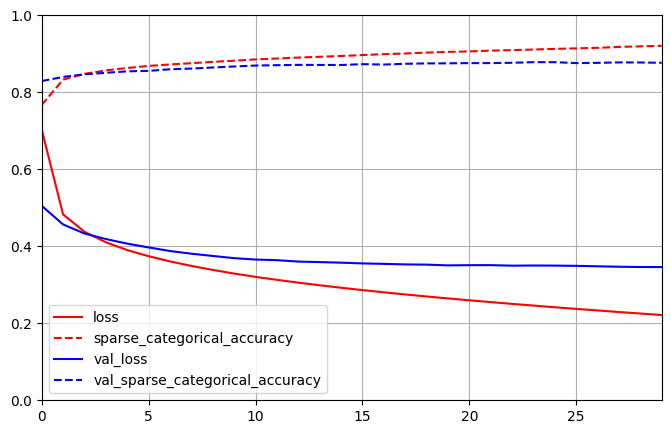

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5),xlim=[0,29],ylim=[0,1],grid=True,
                                   style=['r-','r--','b-','b--'],label=True)
plt.legend(loc="lower left")
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3708 - sparse_categorical_accuracy: 0.8697


[0.36737146973609924, 0.8723000288009644]

In [ ]:
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.35, 0.  , 0.01, 0.  , 0.64],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred=np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['ankle boot', 'pullover', 'trouser'], dtype='<U11')

In [ ]:
class_names[5]

'sandal'

In [ ]:
y_new=y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

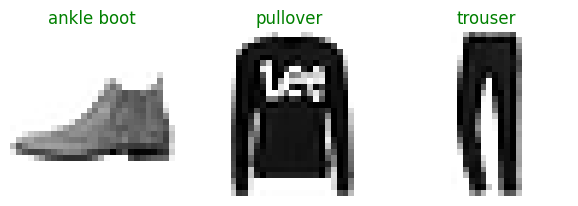

In [ ]:
plt.figure(figsize=(7.2,2.4))

for index,image in enumerate(X_new):
  plt.subplot(1,3,index+1)
  plt.imshow(image,cmap='binary',interpolation='nearest')
  plt.axis('off')
  plt.title(class_names[y_new[index]],fontsize=12,color='g'if y_pred[index]==y_new[index] else 'r')

plt.subplots_adjust(wspace=0.2,hspace=0.5)

#Regression with MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing= fetch_california_housing()
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

norm_layer=tf.keras.layers.Normalization()
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')

])

norm_layer.adapt(X_train)

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['RootMeanSquaredError'])



In [ ]:
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - RootMeanSquaredError: 0.9949 - loss: 1.0402 - val_RootMeanSquaredError: 1.7068 - val_loss: 2.9131
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7044 - loss: 0.4970 - val_RootMeanSquaredError: 2.7152 - val_loss: 7.3725
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6771 - loss: 0.4590 - val_RootMeanSquaredError: 1.2670 - val_loss: 1.6052
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6454 - loss: 0.4168 - val_RootMeanSquaredError: 1.4823 - val_loss: 2.1973
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6320 - loss: 0.3996 - val_RootMeanSquaredError: 0.9362 - val_loss: 0.8766
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6208 - loss: 0.3856 - val_RootMeanSquaredError: 0.9112 - val_loss: 0.8303
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6135 - los

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,250 (4.89 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model.predict(X_test[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


array([[0.7182674]], dtype=float32)

#Functional API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer=tf.keras.layers.Normalization()
hidden_layer1=tf.keras.layers.Dense(30,activation='relu')
hidden_layer2=tf.keras.layers.Dense(30,activation='relu')
concat_layer=tf.keras.layers.Concatenate()
output_layer=tf.keras.layers.Dense(1)

input_=tf.keras.layers.Input(shape=[8])
normalized=normalization_layer(input_)
hidden1=hidden_layer1(normalized)
hidden2=hidden_layer2(hidden1)
concat=concat_layer([normalized,hidden2])
output=output_layer(concat)

model=tf.keras.Model(inputs=[input_],outputs=[output])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

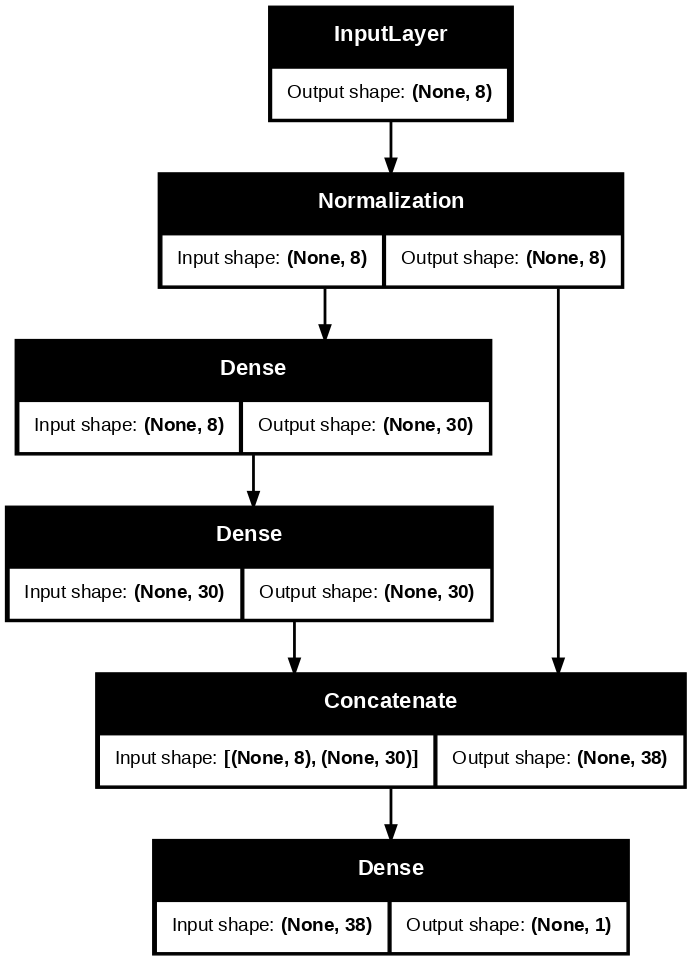

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=100)

In [ ]:
normalization_layer.adapt(X_train)
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['RootMeanSquaredError'])
model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test=model.evaluate(X_test,y_test)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - RootMeanSquaredError: 1.5918 - loss: 2.7000 - val_RootMeanSquaredError: 0.6920 - val_loss: 0.4789
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7029 - loss: 0.4956 - val_RootMeanSquaredError: 0.6136 - val_loss: 0.3765
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6461 - loss: 0.4180 - val_RootMeanSquaredError: 0.8912 - val_loss: 0.7942
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6285 - loss: 0.3954 - val_RootMeanSquaredError: 0.8731 - val_loss: 0.7622
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6177 - loss: 0.3818 - val_RootMeanSquaredError: 1.3335 - val_loss: 1.7783
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6101 - loss: 0.3724 - val_RootMeanSquaredError: 1.3083 - val_loss: 1.7116
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6026 - loss: 0.3633 -

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
input_wide=tf.keras.layers.Input(shape=[5])
input_deep=tf.keras.layers.Input(shape=[6])
norm_layer_wide=tf.keras.layers.Normalization()
norm_layer_deep=tf.keras.layers.Normalization()
norm_wide=norm_layer_wide(input_wide)
norm_deep=norm_layer_deep(input_deep)
hidden1=tf.keras.layers.Dense(30,activation='relu')(norm_deep)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)
concat=tf.keras.layers.concatenate([input_wide,hidden2])
output=tf.keras.layers.Dense(1)(concat)
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output])

In [ ]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['RootMeanSquaredError']
              )

X_train_wide,X_train_deep=X_train[:,:5],X_train[:,2:]
X_valid_wide,X_valid_deep=X_valid[:,:5],X_valid[:,2:]
X_test_wide,X_test_deep=X_test[:,:5],X_test[:,2:]
X_new_wide,X_new_deep=X_test_wide[:3],X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history=model.fit((X_train_wide,X_train_deep),y_train,epochs=20,
                  validation_data=((X_valid_wide,X_valid_deep),y_valid))

mse_test=model.evaluate((X_test_wide,X_test_deep),y_test)
y_pred=model.predict((X_new_wide,X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - RootMeanSquaredError: 3.7705 - loss: 18.4545 - val_RootMeanSquaredError: 1.6130 - val_loss: 2.6016
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 1.1313 - loss: 1.2826 - val_RootMeanSquaredError: 1.0017 - val_loss: 1.0034
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.8709 - loss: 0.7592 - val_RootMeanSquaredError: 0.9693 - val_loss: 0.9396
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7973 - loss: 0.6362 - val_RootMeanSquaredError: 0.8432 - val_loss: 0.7111
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7668 - loss: 0.5886 - val_RootMeanSquaredError: 1.5014 - val_loss: 2.2542
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7281 - loss: 0.5305 - val_RootMeanSquaredError: 1.3698 - val_loss: 1.8763
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7108 - lo

In [ ]:
input_wide=tf.keras.layers.Input(shape=[5])
input_deep=tf.keras.layers.Input(shape=[6])

norm_wide=tf.keras.layers.Normalization()
norm_deep=tf.keras.layers.Normalization()

norm_wide_layer = norm_wide(input_wide)
norm_deep_layer = norm_deep(input_deep)

hidden1=tf.keras.layers.Dense(30,activation='relu')(norm_deep_layer)
hidden2=tf.keras.layers.Dense(30,activation='relu')(hidden1)

concat=tf.keras.layers.concatenate([norm_wide_layer,hidden2])

output=tf.keras.layers.Dense(1,'linear')(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)



In [ ]:
model=tf.keras.Model(inputs=[input_wide,input_deep],outputs=[output, aux_output])

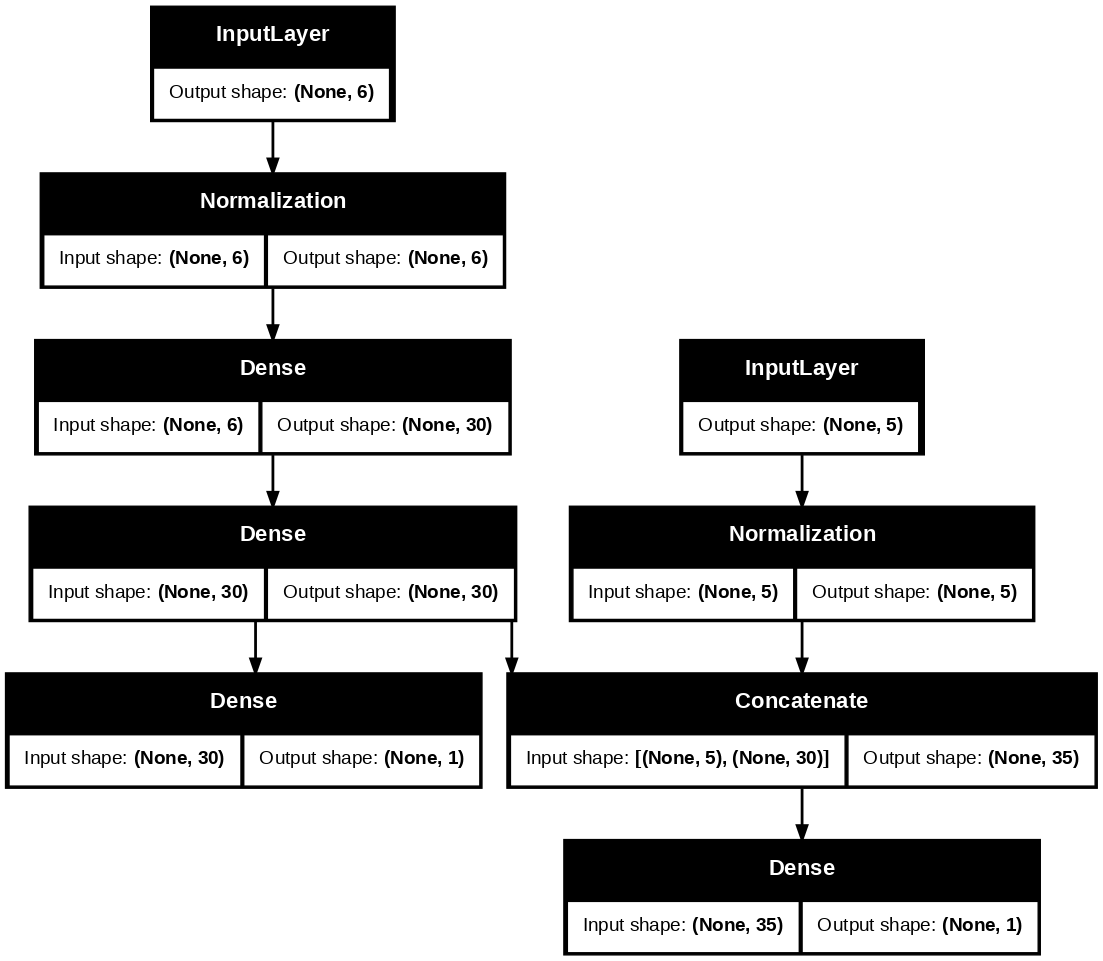

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 100)

In [ ]:
# model.compile(loss='mse',
#                optimizer='adam',
#                metrics=['RootMeanSquaredError']
#               )


In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = ('mse','mse'), loss_weights=(0.9,0.1),
              optimizer=optimizer,
              metrics=['RootMeanSquaredError', 'RootMeanSquaredError'])

2 output olduguna gore iki metrics ve iki loss yazilir

#Subclass API

In [ ]:
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
  def __init__(self,units=30,activation='relu',**kwarks):
    super().__init__(**kwarks)
    self.norm_layer_wide=tf.keras.layers.Normalization()
    self.norm_layer_deep=tf.keras.layers.Normalization()
    self.hidden1=tf.keras.layers.Dense(units,activation=activation)
    self.hidden2=tf.keras.layers.Dense(units,activation=activation)
    self.main_output=tf.keras.layers.Dense(1)
    self.aux_output=tf.keras.layers.Dense(1)

  def call(self,inputs):
    input_wide,input_deep=inputs
    norm_wide=self.norm_layer_wide(input_wide)
    norm_deep=self.norm_layer_deep(input_deep)
    hidden1=self.hidden1(norm_deep)
    hidden2=self.hidden2(hidden1)
    concat=tf.keras.layers.concatenate([norm_wide,hidden2])
    output=self.main_output(concat)
    aux_output=self.aux_output(hidden2)
    return output,aux_output


tf.random.set_seed(42)
model=  WideAndDeepModel(30,activation='relu',name='my_cool_model')

In [ ]:
optimizer=tf.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = ('mse','mse'), loss_weights=(0.9,0.1),
              optimizer=optimizer,
              metrics=['RootMeanSquaredError', 'RootMeanSquaredError'])

model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history=model.fit((X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
                  validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)))

eval_results=model.evaluate((X_test_wide,X_test_deep),(y_test,y_test))
y_pred_main,y_pred_aux=model.predict((X_new_wide,X_new_deep))


Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - RootMeanSquaredError: 1.6518 - RootMeanSquaredError_1: 1.8443 - loss: 2.8990 - mse_loss: 3.4967 - val_RootMeanSquaredError: 2.9981 - val_RootMeanSquaredError_1: 2.5486 - val_loss: 8.7393 - val_mse_loss: 6.4925
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.7817 - RootMeanSquaredError_1: 0.9119 - loss: 0.6335 - mse_loss: 0.8324 - val_RootMeanSquaredError: 1.7620 - val_RootMeanSquaredError_1: 1.3167 - val_loss: 2.9676 - val_mse_loss: 1.7330
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.7089 - RootMeanSquaredError_1: 0.8013 - loss: 0.5167 - mse_loss: 0.6422 - val_RootMeanSquaredError: 1.0244 - val_RootMeanSquaredError_1: 0.8231 - val_loss: 1.0122 - val_mse_loss: 0.6774
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.6692 - RootMeanSquaredError_1: 0.7640 - loss: 0.4617 - mse_loss: 0.5839 - val_RootMeanSquaredError: 0.6329 - val_RootMeanSquaredE

#Saving and Restoring a Model

In [ ]:
import shutil

shutil.rmtree('my_keras_model.keras',ignore_errors=True)

In [ ]:
model.save('my_keras_model.keras')

In [ ]:
# model = tf.keras.models.load_model('/context/my_keras_model.keras')

# y_pred_main,y_pred_aux=model.predict((X_new,X_new_deep))

#CALLBACK

In [ ]:
import shutil

shutil.rmtree('my_checkpoints', ignore_errors=True)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.keras', save_best_only=True,save_freq='epoch',save_weights_only=False)

history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5744 - RootMeanSquaredError_1: 0.6213 - loss: 0.3357 - mse_loss: 0.3861 - val_RootMeanSquaredError: 0.9932 - val_RootMeanSquaredError_1: 0.6818 - val_loss: 0.9344 - val_mse_loss: 0.4648
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5734 - RootMeanSquaredError_1: 0.6157 - loss: 0.3338 - mse_loss: 0.3792 - val_RootMeanSquaredError: 1.1266 - val_RootMeanSquaredError_1: 0.8165 - val_loss: 1.2090 - val_mse_loss: 0.6665
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5734 - RootMeanSquaredError_1: 0.6154 - loss: 0.3339 - mse_loss: 0.3788 - val_RootMeanSquaredError: 1.0675 - val_RootMeanSquaredError_1: 1.0782 - val_loss: 1.1418 - val_mse_loss: 1.1620
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5722 - RootMeanSquaredError_1: 0.6144 - loss: 0.3325 - mse_loss: 0.3776 - val_RootMeanSquaredError: 0.9528 - val_RootMeanSquaredEr

In [ ]:
early_stopping_cb=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history=model.fit((X_train_wide,X_train_deep), (y_train,y_train),epochs=100,
validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5636 - RootMeanSquaredError_1: 0.6059 - loss: 0.3226 - mse_loss: 0.3672 - val_RootMeanSquaredError: 0.9133 - val_RootMeanSquaredError_1: 0.9161 - val_loss: 0.8346 - val_mse_loss: 0.8390
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5632 - RootMeanSquaredError_1: 0.6042 - loss: 0.3221 - mse_loss: 0.3651 - val_RootMeanSquaredError: 0.7889 - val_RootMeanSquaredError_1: 0.7819 - val_loss: 0.6213 - val_mse_loss: 0.6112
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.5614 - RootMeanSquaredError_1: 0.6029 - loss: 0.3201 - mse_loss: 0.3636 - val_RootMeanSquaredError: 0.6411 - val_RootMeanSquaredError_1: 0.6727 - val_loss: 0.4152 - val_mse_loss: 0.4524
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.5598 - RootMeanSquaredError_1: 0.6014 - loss: 0.3183 - mse_loss: 0.3617 - val_RootMeanSquaredError: 0.7053 - val_RootMeanSquar

In [ ]:
class PrintValTrainRationalCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    ratio=logs['val_loss']/logs['loss']
    print(f'Epoch={epoch},val?train={ratio:.2f}')

In [ ]:
val_train_ratio_cb=PrintValTrainRationalCallback()
history=model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=10,
    validation_data=((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
                  callbacks=[val_train_ratio_cb],verbose=0)



Epoch=0,val?train=1.07
Epoch=1,val?train=1.69
Epoch=2,val?train=1.72
Epoch=3,val?train=1.65
Epoch=4,val?train=1.71
Epoch=5,val?train=1.41
Epoch=6,val?train=1.34
Epoch=7,val?train=1.24
Epoch=8,val?train=1.17
Epoch=9,val?train=1.28
